### Simple Linear Regression 예제 작성 (온도 & 오존량)
- 생각보다 잘 학습이 안되고 예측값도 엉망이다.
- sklearn을 이용해서 학습시키고 그 결과를 비교해보았다.

- 데이터 전처리가 미흡했기 때문.
- 데이터 전처리
    - 1. 결측치 처리
    - 2. 이상치 처리 (tukey outlier, z-score)
    - 3. 정규화 처리 (Normalization)
    - 4. 학습에 필요한 feature들을 선별해서 학습이 더 잘 이루어 지도록.
        - 새로운 feature를 만들어서 학습에 응용하는 작업.

(116, 2)
(113, 2)
(107, 2)
W : [[0.58741537]], b: [0.30735817], loss : 572.4973463604148
W : [[0.50440641]], b: [0.19931539], loss : 528.6595139043892
W : [[0.50576728]], b: [0.09229878], loss : 528.2777078621693
W : [[0.50712708]], b: [-0.01463368], loss : 527.8965020932354
W : [[0.5084858]], b: [-0.12148205], loss : 527.5158956538422
W : [[0.50984346]], b: [-0.22824639], loss : 527.135887601728
W : [[0.51120005]], b: [-0.33492677], loss : 526.7564769961135
W : [[0.51255558]], b: [-0.44152325], loss : 526.3776628976924
W : [[0.51391004]], b: [-0.54803591], loss : 525.9994443686421
W : [[0.51526343]], b: [-0.6544648], loss : 525.6218204726111


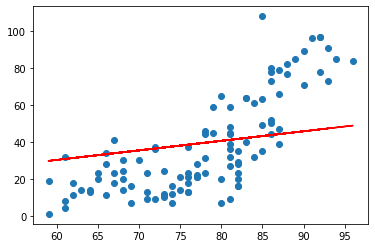

[[31.26937447]]


In [6]:
import numpy as np
import pandas as pd
from my_library.machine_learning_library import numerical_derivative
import matplotlib.pyplot as plt
# SciPy는 수치해석 패키지
# stats 서브패키지는 확률분포 분석 기능 제공
from scipy import stats 

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Temp', 'Ozone']]
training_data = training_data.dropna(how='any')
print(training_data.shape)  # (116, 2)

# 2. 이상치 처리
zscore_threshold = 2.0  # 97.7 % 이상, 2.3% 이하인 값들을 이상치로 판별.

# Temp에 대한 이상치(지대점)를 확인하고 제거
stats.zscore(training_data['Temp']) # Z-score로 변환, -1 ~ 1 사이로 표현됨
outliers = training_data['Temp'][np.abs(stats.zscore(training_data['Temp'])) > zscore_threshold]
# 이상치가 아닌 데이터만 남긴다.
training_data = training_data.loc[~training_data['Temp'].isin(outliers)]
print(training_data.shape) # (113, 2)

# Oznone에 대한 이상치 (outlier)를 확인하고 제거
stats.zscore(training_data['Ozone'])
outliers = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold]
training_data = training_data.loc[~training_data['Ozone'].isin(outliers)]

print(training_data.shape) # (107, 2)

# 3. Training Data Set
x_data = training_data['Temp'].values.reshape(-1, 1)
t_data = training_data['Ozone'].values.reshape(-1, 1)

# 4. Weight & bias
W = np.random.rand(1, 1)
b = np.random.rand(1)

# 5. loss function
def loss_func(x, t):
    y = np.dot(x, W) + b
    return np.mean(np.power((t-y),2))

def predict(x):
    return np.dot(x, W) + b

# 6. learning_rate 
learning_rate = 1e-5
f = lambda x : loss_func(x_data,t_data)

# 7. 학습을 진행
for step in range(30000):

    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    
    if step % 3000 == 0:
        print('W : {}, b: {}, loss : {}'.format(W, b, loss_func(x_data, t_data)))
        
plt.scatter(x_data, t_data)
plt.plot(x_data, np.dot(x_data, W) + b, color='r')
plt.show()

# 8. 예측하기
print(predict(62))
# [[31.26937447]]
# 그닥 정확하지 않다.

* 데이터가 가진 feature들의 scale (단위/ 범위)이 심하게 차이 나는 경우, 이를 조정해줘야 한다.
    * 정규화 (Normalization)
    
 
   
### 집에 대한 데이터로 예를 들어 보자.
* 집에 대한 feature가 2개가 있다.
* 하나는 방의 개수 (1, 2, 3, 4, 5, ..., 20)
    * -> 1 ~ 20, 숫자 차이가 크지 않지만
* 집의 연식 (월) (12, 24, .., 120, 240, ..) 
    * -> 12 ~ 240, 숫자 차이가 크다.

* 각 feature들에 대한 동일한 scale을 적용할 필요가 있다. (0 ~ 1 사이로)


## 정규화
### 1. Min-Max Normalization (정규화)
> x scaled = (xi - x min ) / (x max - x min)

### 2. Standardization (표준화) - Z-Score Normalization
> x scaled = ( xi - μ (x의 평균)) / σ (분산)

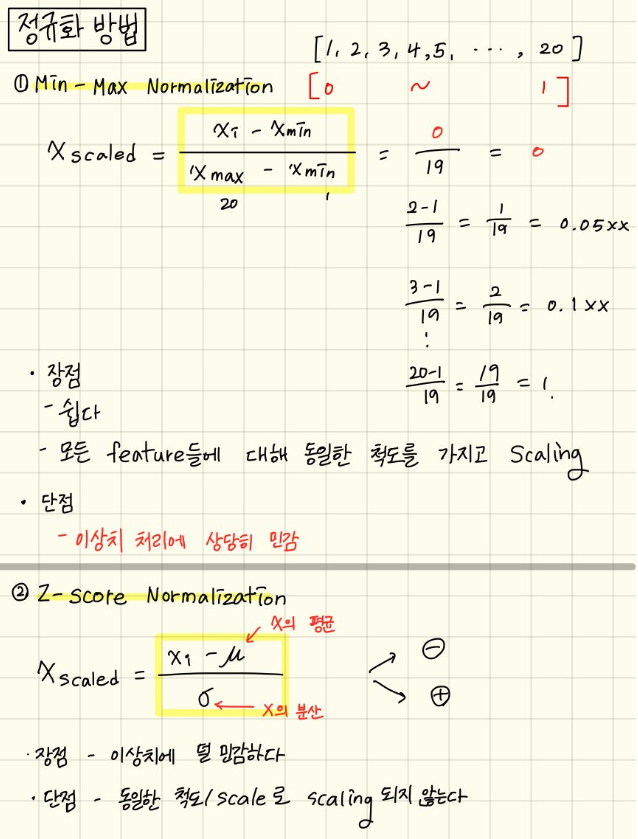

- 사실 둘 다 정규화임

### **Z-Score Normalization (Standardization)**
>- 평균과 분산을 이용한 scaling -> 이상치에 덜 민감
>- 하지만 모든 feature에 동일한 척도를 제공하지 못한다.


### MinMaxScaler() 객체 이용
> - sklearn을 이용하여 정규화 처리를 해보자

In [15]:
# sklearn의 MinMaxScaler()로 정규화 처리
import numpy as np
import pandas as pd
from my_library.machine_learning_library import numerical_derivative
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Temp', 'Ozone']]
training_data = training_data.dropna(how='any')
print(training_data.shape)  # (116, 2)

# 2. 이상치 처리
zscore_threshold = 2.0 # 97.7% 이상, 2.3% 이하인 값들을 이상치로 판별

# outlier를 출력
# Temp에 대한 이상치 (지대점)를 확인
outliers = training_data['Temp'][np.abs(stats.zscore(training_data['Temp'])) > zscore_threshold]

training_data = training_data.loc[~training_data['Temp'].isin(outliers)]
# ~ not
print(training_data.shape) # (113, 2)

# Ozone에 대한 이상치(outlier)를 확인하고 제거
outliers = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold]

training_data = training_data.loc[~training_data['Ozone'].isin(outliers)]
print(training_data.shape) # (107, 2)


### 3. 정규화 처리 ###
# 직접 구현해도 되지만 sklearn을 이용해보자.

# 독립변수와 종속변수의 scaler객체를 각각 생성
scaler_x = MinMaxScaler()  # MinMaxScaler 클래스의 객체를 생성
scaler_t = MinMaxScaler()  # MinMaxScaler 클래스의 객체를 생성

scaler_x.fit(training_data['Temp'].values.reshape(-1, 1))
scaler_t.fit(training_data['Ozone'].values.reshape(-1, 1))


print(scaler_x.n_samples_seen_) # 107
print(scaler_x.data_min_)       # [59.]
print(scaler_x.data_max_)       # [96.]

print('\ntraining_data[\'Temp\'].values # 정규화 되지 않은 값')
print(training_data['Temp'].values) # 정규화 되지 않은 값

training_data['Temp'] = scaler_x.transform(training_data['Temp'].values.reshape(-1, 1))
print('\ntraining_data[\'Temp\'].values # 정규화 된 값')
print(training_data['Temp'].values) # 정규화 된 값

training_data['Ozone'] = scaler_t.transform(training_data['Ozone'].values.reshape(-1, 1))
print('\ntraining_data[\'Ozone\'].values # 정규화 된 값')
print(training_data['Ozone'].values) # 정규화 된 값

(116, 2)
(113, 2)
(107, 2)
107
[59.]
[96.]

training_data['Temp'].values # 정규화 되지 않은 값
[67 72 74 62 66 65 59 61 74 69 66 68 64 66 68 62 59 73 61 61 67 81 76 82
 90 87 82 77 72 65 73 76 85 81 83 83 88 92 92 89 73 81 80 81 82 84 87 85
 74 86 85 82 86 88 86 83 81 81 81 82 86 85 87 90 86 82 80 77 79 76 78 78
 77 72 79 86 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71 71 78 67 76
 68 82 64 71 81 69 63 70 75 76 68]

training_data['Temp'].values # 정규화 된 값
[0.21621622 0.35135135 0.40540541 0.08108108 0.18918919 0.16216216
 0.         0.05405405 0.40540541 0.27027027 0.18918919 0.24324324
 0.13513514 0.18918919 0.24324324 0.08108108 0.         0.37837838
 0.05405405 0.05405405 0.21621622 0.59459459 0.45945946 0.62162162
 0.83783784 0.75675676 0.62162162 0.48648649 0.35135135 0.16216216
 0.37837838 0.45945946 0.7027027  0.59459459 0.64864865 0.64864865
 0.78378378 0.89189189 0.89189189 0.81081081 0.37837838 0.59459459
 0.56756757 0.59459459 0.62162162 0.67567568 0.75675676 0.7027027
 0.40540541

W : [[0.95863399]], b : [0.89319108], loss : 1.0953184827989706
W : [[0.58925001]], b : [0.05034814], loss : 0.026958620705335695
W : [[0.63353509]], b : [0.02647454], loss : 0.026109357025212634
W : [[0.66726046]], b : [0.00869207], loss : 0.02562174058106432
W : [[0.69281954]], b : [-0.00478434], loss : 0.025341679585883358
W : [[0.71218966]], b : [-0.01499753], loss : 0.025180827420381052
W : [[0.72686944]], b : [-0.02273766], loss : 0.025088442477129443
W : [[0.73799461]], b : [-0.02860357], loss : 0.025035381471000272
W : [[0.7464259]], b : [-0.03304909], loss : 0.025004906046408978
W : [[0.7528156]], b : [-0.03641816], loss : 0.024987402580648094


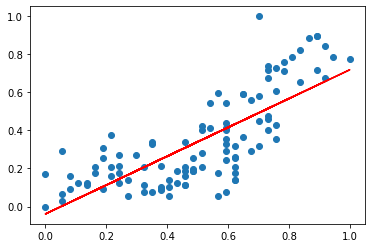

[[46.93582126]]


In [19]:
# 4. Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# 5. Weight & bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# 6. loss function
def loss_func(x,t):
    y = np.dot(x,W) + b
    return np.mean(np.power((t-y),2))

def predict(x):
    return np.dot(x,W) + b

# 7. learning_rate
learning_rate = 1e-4
f = lambda x : loss_func(x_data,t_data)

# 8. 학습을 진행
for step in range(300000):
    W -= learning_rate * numerical_derivative(f,W)
    b -= learning_rate * numerical_derivative(f,b)

    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data,t_data)))

plt.scatter(x_data,t_data)
plt.plot(x_data, np.dot(x_data,W) + b, color='r')
plt.show()

print(predict(62))

In [20]:
predict_data = np.array([62])
scaled_predict_data = scaler_x.transform(predict_data.reshape(-1, 1))
print(scaled_predict_data)

scaled_result = predict(scaled_predict_data)
print(scaled_result) # 예측결과

result = scaler_t.inverse_transform(scaled_result) # 정규화된 결과 원상 복귀 
print('예측된 Ozone량은: {}'.format(result))

[[0.08108108]]
[[0.02246036]]
예측된 Ozone량은: [[3.40325891]]


### 수행평가 문제
>- 온도, 바람, 태양광 3개의 데이터를 이용하여 오존량을 학습하고 예측하는 **Multiple Linear Regression** 구현
>- 결과값은 sklearn에서 구현한 결과와 비교해서 확인하기

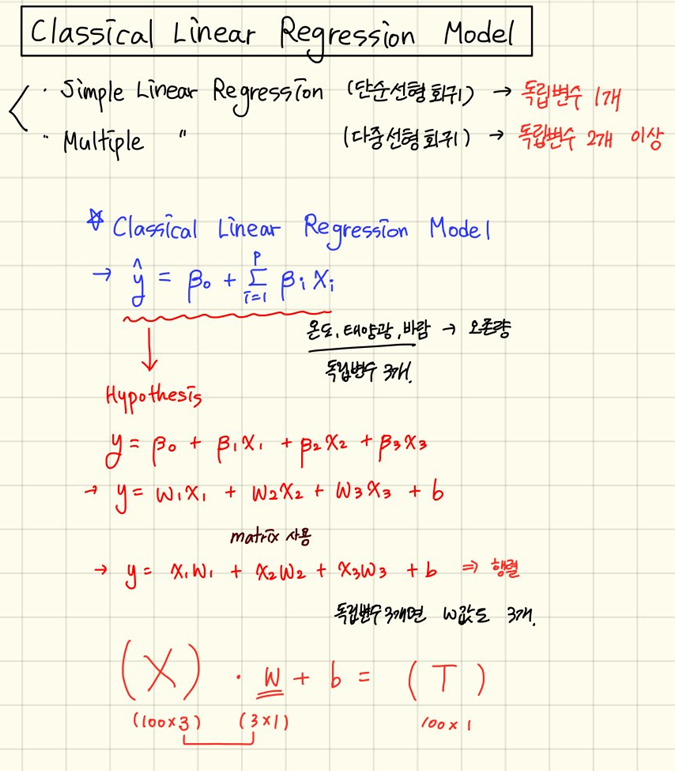

In [24]:
import numpy as np
import pandas as pd
from my_library.machine_learning_library import numerical_derivative
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Temp', 'Ozone']]
training_data = training_data.dropna(how='any')
print(training_data.shape)  # (116, 2)

# 2. 이상치 처리
zscore_threshold = 2.0
# 97.7 % 이상, 2.3% 이하인 값들을 이상치로 핀별

# 각 column의 이상치를 확인하고 제거
for col in training_data.columns:
    outliers = training_data[col][np.abs(stats.zscore(training_data[col])) > zscore_threshold]
    training_data = training_data.loc[~training_data[col].isin(outliers)]
    
print(training_data)
#          Temp  Ozone
#     0      67   41.0
#     1      72   36.0
#     2      74   12.0
#     3      62   18.0
#     5      66   28.0
#     ..    ...    ...
#     147    63   14.0
#     148    70   30.0
#     150    75   14.0
a#     151    76   18.0
#     152    68   20.0

#     [107 rows x 2 columns]

# 3. 정규화 처리
# - 직접 구현해도 되지만 sklearn 이용
 
# 독립변수와 종속변수의 scaler 객체를 각각 생성
scaler_x = MinMaxScaler()  # MinMaxScaler 클래스의 객체를 생성
scaler_t = MinMaxScaler()  # MinMaxScaler 클래스의 객체를 생성

training_data_x = training_data.iloc[:,:-1]
training_data_t = training_data['Ozone'].values.reshape(-1,1)

scaler_x.fit(training_data_x)
scaler_t.fit(training_data_t)

training_data_x = scaler_x.transform(training_data_x)
training_data_t = scaler_t.transform(training_data_t)

# 4. Training Data Set
x_data = training_data_x
t_data = training_data_t 

# 5. Weight & bias
W = np.random.rand(3,1)
b = np.random.rand(1)

# 6. loss function
def loss_func(x, t):
    y = np.dot(x, W) + b
    return np.mean(np.power((t-y), 2))

def predict(x):
    return np.dot(x, W) + b

# 7. learning_rate
learning_rate = 1e-4
f = lambda x : loss_func(x_data,t_data)


# 8. 학습 진행
for step in range(300000):
    
    W -= learning_rate * numerical_derivative(f,W)
    b -= learning_rate * numerical_derivative(f,b)
    
    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data,t_data)))


predict_val = nd.array([200,10,70]).reshape(-1,3)
print(predict(predict_val))  

(116, 2)
     Temp  Ozone
0      67   41.0
1      72   36.0
2      74   12.0
3      62   18.0
5      66   28.0
..    ...    ...
147    63   14.0
148    70   30.0
150    75   14.0
151    76   18.0
152    68   20.0

[107 rows x 2 columns]


ValueError: shapes (107,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)